In [2]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from ipywidgets import interactive

In [6]:
grant_data = pd.read_csv('Administrative_Discretionary_Grants__FY_1996-2014_.csv')
#grant_data.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 35: invalid continuation byte

In [117]:
grant_data.columns
grant_data['Requested Award Amount'] = grant_data['Requested Award Amount'].str.slice(1).astype(float)

Index(['Log Number', 'Institution', 'Program', 'Program Type', 'Project Title',
       'Project Type', 'Award Date', 'Address', 'Address 2', 'Address 3',
       'City', 'State', 'Zip Code', 'Total Amount Originally Awarded',
       'Total Amount Awarded and Disbursed', 'Applicant Matching Amount',
       'Requested Award Amount', 'Requested Matching Amount',
       'Title of Principal Investigator', 'First Name', 'Last Name',
       'Organization Type', 'Fiscal Year', 'Award Period From',
       'Award Period To', 'Organizational Unit', 'County Code', 'Census Tract',
       'Census Block', 'MCD Code', 'Place Code', 'CBSA Code', 'MSAD Code',
       'Description', 'Location', 'Organizational Unit Location'],
      dtype='object')

In [118]:
grant_data['Total Amount Awarded and Disbursed'] = grant_data['Total Amount Awarded and Disbursed'].str.slice(1).astype(float)

0          3390.0
1          6030.0
2          6350.0
3          6350.0
4          6190.0
5          3480.0
6          6030.0
7          5870.0
8          6030.0
9          6190.0
10         6190.0
11         6030.0
12         6030.0
13         6030.0
14         6030.0
15         3390.0
16         6030.0
17         6030.0
18         6030.0
19         6030.0
20         6190.0
21         6350.0
22         3390.0
23         5870.0
24         5870.0
25         6190.0
26         6030.0
27         6030.0
28         5870.0
29         3390.0
           ...   
13564     18626.0
13565      2325.0
13566    236575.0
13567    133769.0
13568      4000.0
13569      6110.0
13570    112500.0
13571    149751.0
13572    150000.0
13573      6030.0
13574    147860.0
13575    451970.0
13576     45145.0
13577      5710.0
13578      5000.0
13579     50000.0
13580    728821.0
13581    150000.0
13582      4000.0
13583      4000.0
13584      2325.0
13585    249314.0
13586      2325.0
13587      7730.0
13588     

In [238]:
new_data = grant_data[(grant_data['Requested Award Amount']>grant_data['Total Amount Awarded and Disbursed'])]

1348

In [181]:
def eq_state(state='AL'):
    return new_data[grant_data['State'] == state]

In [241]:
widgets.Dropdown(
    options= np.unique(new_data['State']).tolist(),
    value='IL',
    description='Number:',
    disabled=False,
    button_style='' # 'success', 'info', 'warning', 'danger' or ''
)
#value = eq_state('CO')

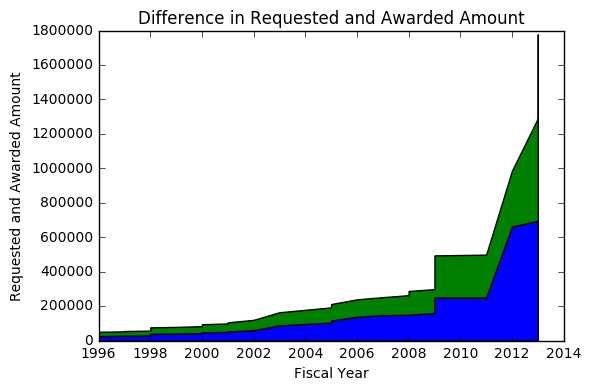

In [242]:
plt.stackplot(np.sort(value['Fiscal Year']), np.sort(value['Requested Award Amount']), np.sort(value['Total Amount Awarded and Disbursed']))
#plt.plot(np.sort(value['Fiscal Year']), np.sort(value['Requested Award Amount']), '--r')
#plt.plot(np.sort(value['Fiscal Year']), np.sort(value['Total Amount Awarded and Disbursed']), '--')
plt.xlabel('Fiscal Year')
plt.ylabel('Requested and Awarded Amount')
plt.title('Difference in Requested and Awarded Amount')
plt.show()

In [259]:
state = np.unique(new_data['State']).tolist()
state

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'FM',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [263]:
#interact(eq_state('AL'), x=state);
items = sorted(new_data['State'].unique().tolist())
items

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'FM',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [3]:
def view(x=''):
    value = eq_state(x)
    plt.stackplot(np.sort(value['Fiscal Year']), np.sort(value['Requested Award Amount']), np.sort(value['Total Amount Awarded and Disbursed']))
    plt.xlabel('Fiscal Year')
    plt.ylabel('Requested and Awarded Amount')
    plt.title('Difference in Requested and Awarded Amount')
    plt.legend(['Awarded Amount', 'Requested Amount'])
    return plt.show()
 
w = widgets.Dropdown(options=items)
interactive(view, x=w)

NameError: name 'items' is not defined

In [ ]:
pwd
